**References**: https://github.com/blockchain-etl/ethereum-etl

# Problem Set 1 Checklist

**Please customize the following inputs to generate your own results for discussion**


 
* Infura/Alchemy/QuickNode API endpoints: experiment with multiple node operators and see if you could get the same data

* Data radius, start, and end blocks: pick a smaller radius for testing before you scale

* Token address: Pick your choice of token in querying the token transfer part

**Please post the sharing (Allow viewing or commenting only) URL for your Google Colab after you are done below.**

Important: Change your private API token key to "API_KEY" before posting 


## Question 1 
Did you get the same data querying via different node operators? Please point to at least one specific observation to validate your answer. 

Please insert Figures/Tables to better represent your idea. 


Yes I get the same data querying via different node operators. 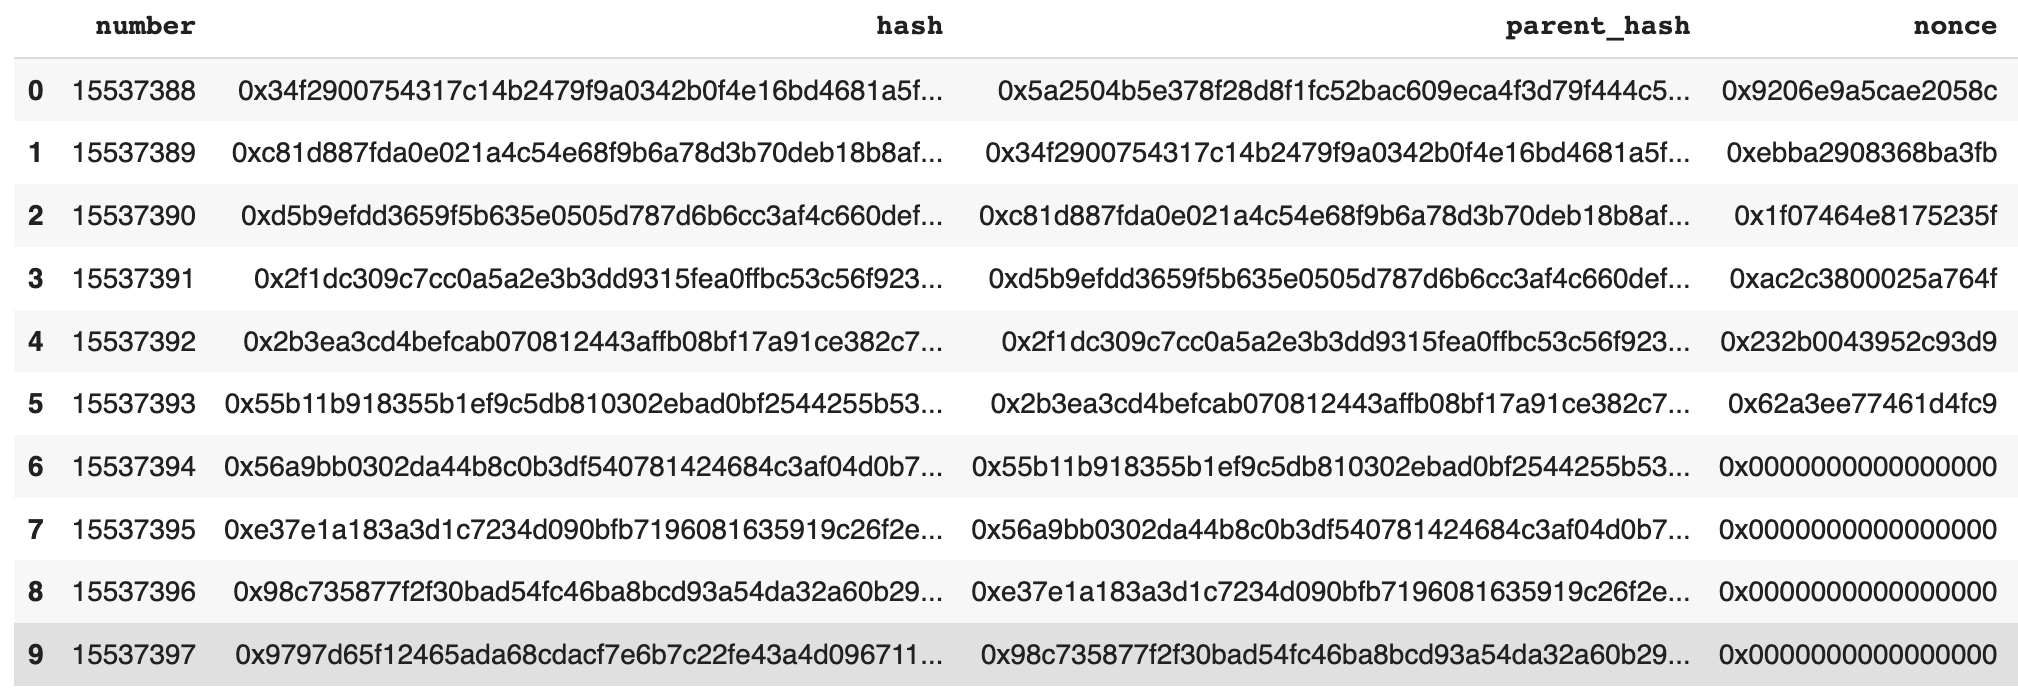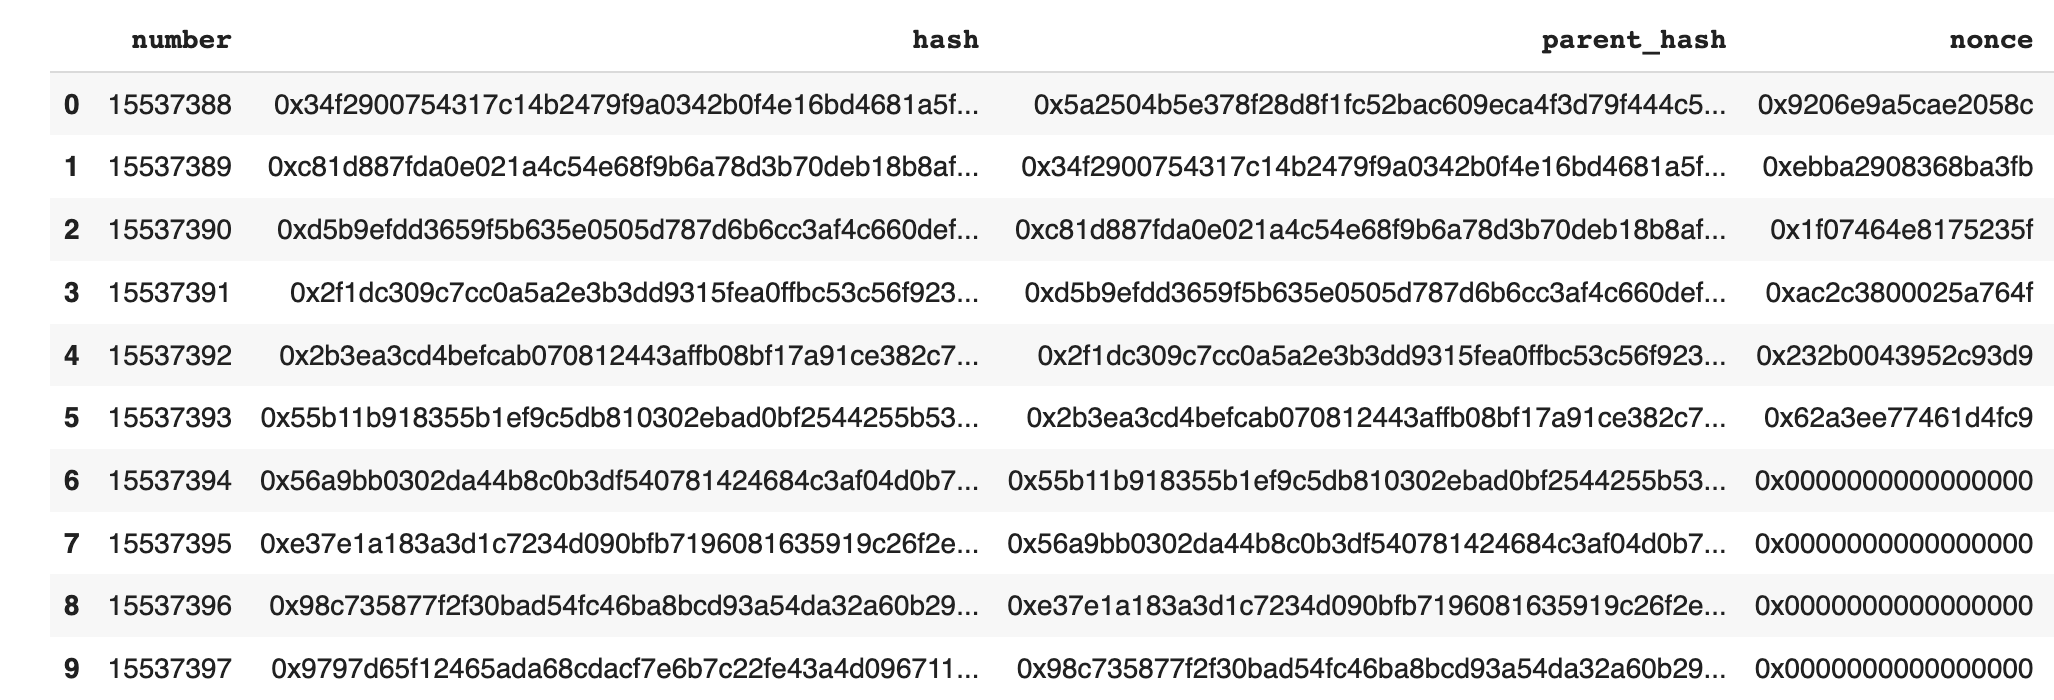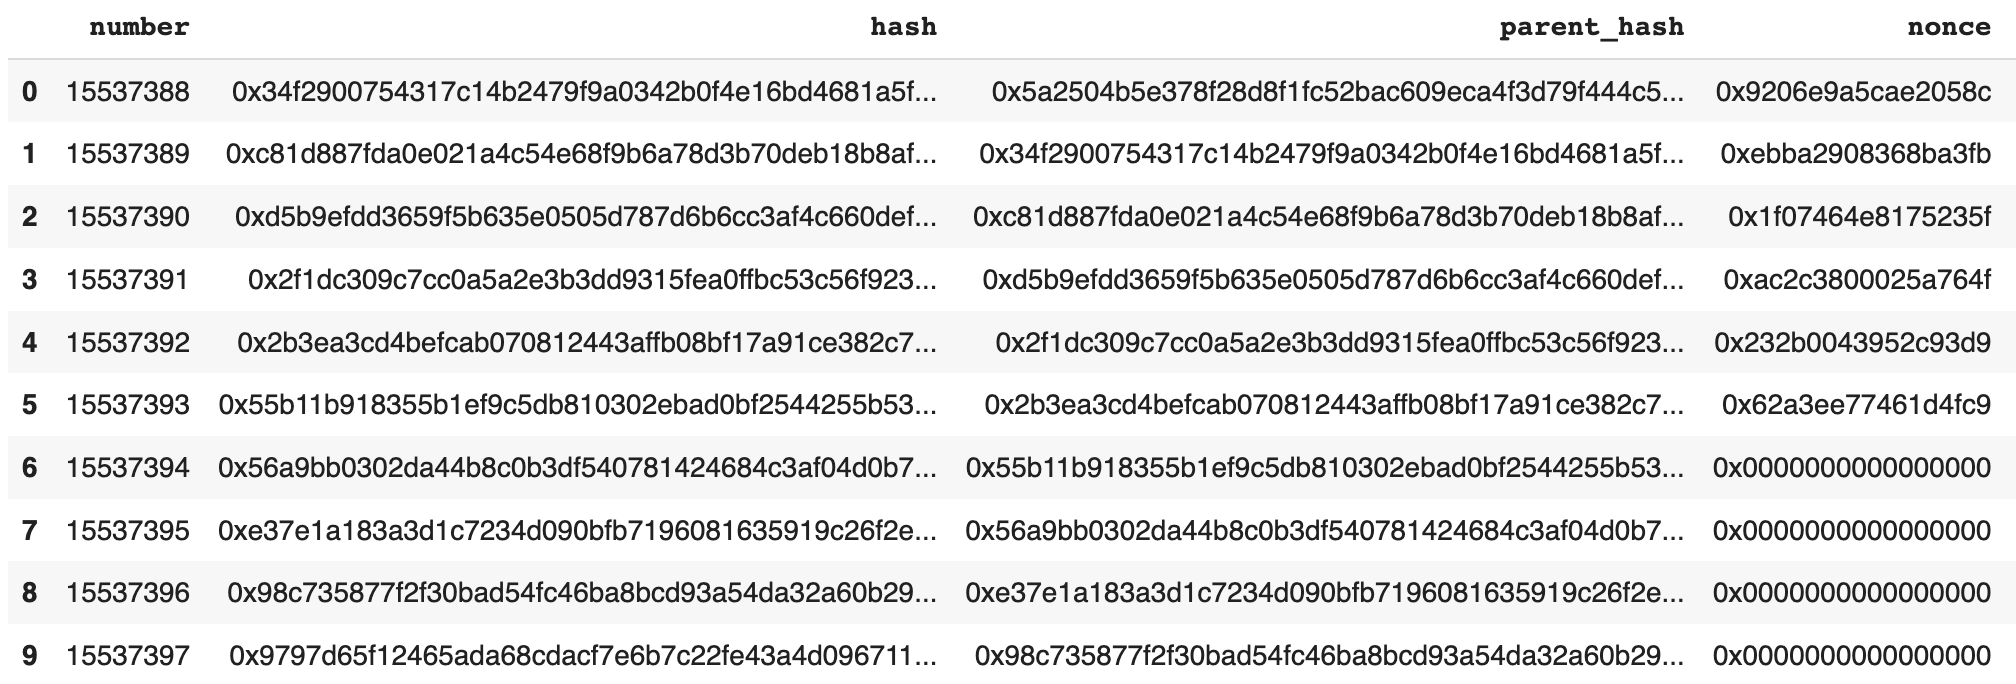

Above are three graphs I get from the three different platform. Comparing there number and hash number, they are exactly the same.

## Question 2

Please introduce the token that you queried in 100 words:


*   when the token first was issued?
*   what functions do the token support?
*.  what is the current market value of the token? 

Please provide references that could back-up your answer. 
Please insert Figures/Tables to better represent your idea. 


Uniswap tokens allow the community to own and actively manage the protocol[(“Introducing UNI” 2020) ]((https://uniswap.org/blog/uni)). And UNI holders could manage the protocol by an on-chain governance process. The Uniswap token was issued on September 16, 2020 [(“Uniswap Protocol Token (UNI) Price Today, Value, Real-Time Charts & News” n.d.)](https://www.forbes.com/digital-assets/assets/uniswap-protocol-token-uni/?sh=1d2768f25e56). The current market value for this token is US 5.79 dollar, with a 24-hour trading volume of $94.82 M [(“Uniswap Price | UNI Price, USD Converter, Charts | Crypto.com” 2018)](https://crypto.com/price/uniswap). 


Here is a trading [graph](https://crypto.com/price/uniswap) and price trend of this token.
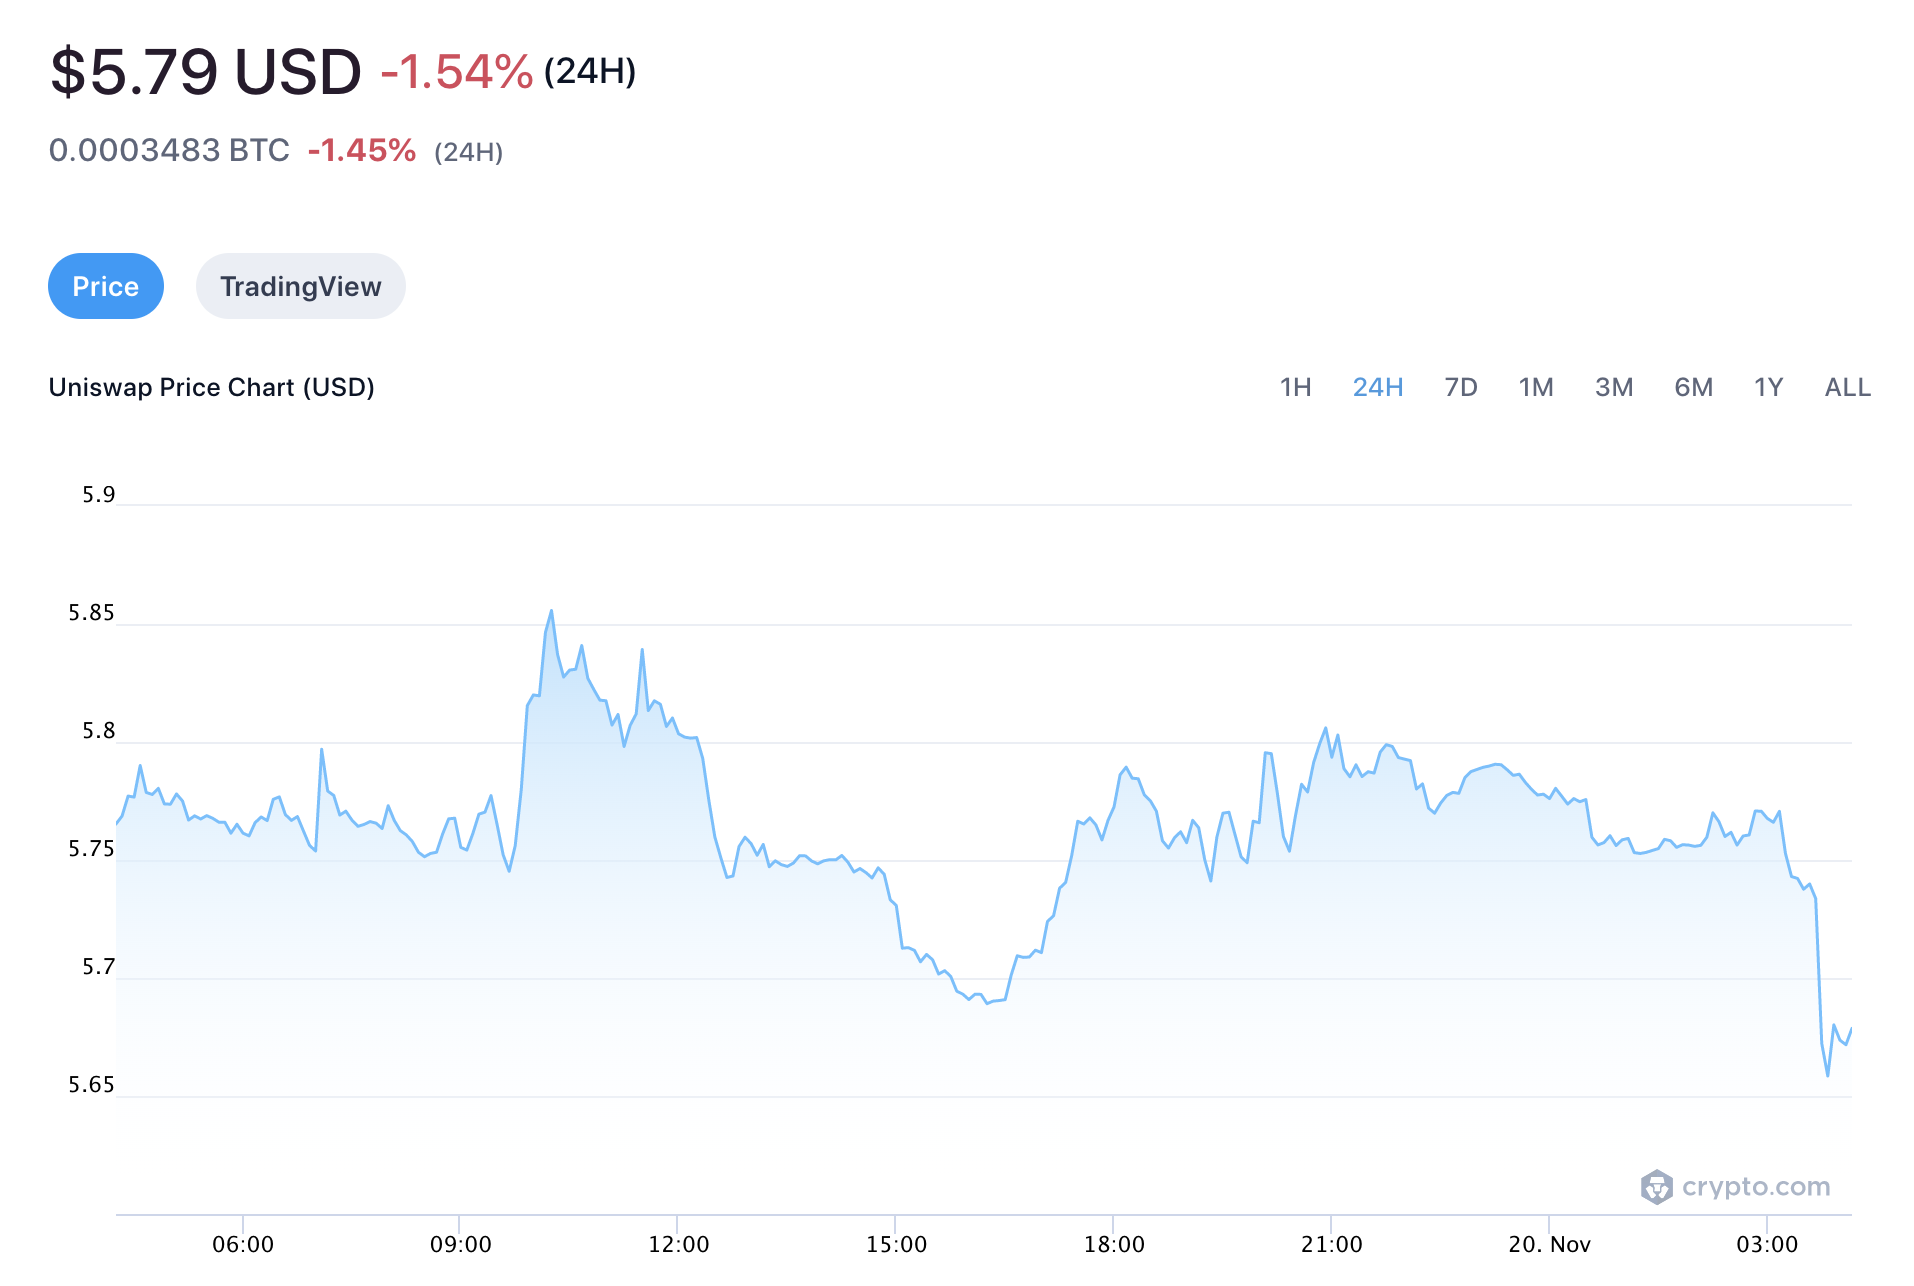

### Question 3: 

What are the changes of Ethereum before and after the merge? Please identify at least three different changes to elaborate on. 

Please provide references that could back-up your answer. 

Please insert Figures/Tables to better represent your idea. 



Firstly, the consensus machanism change before and after the merge, it is changed from proof of work to proof of stake [(Marcobello 2022)](https://www.coindesk.com/learn/what-is-the-merge-and-why-has-it-taken-so-long/). The [graph](https://www.coindesk.com/learn/what-is-the-merge-and-why-has-it-taken-so-long/) is shown below:
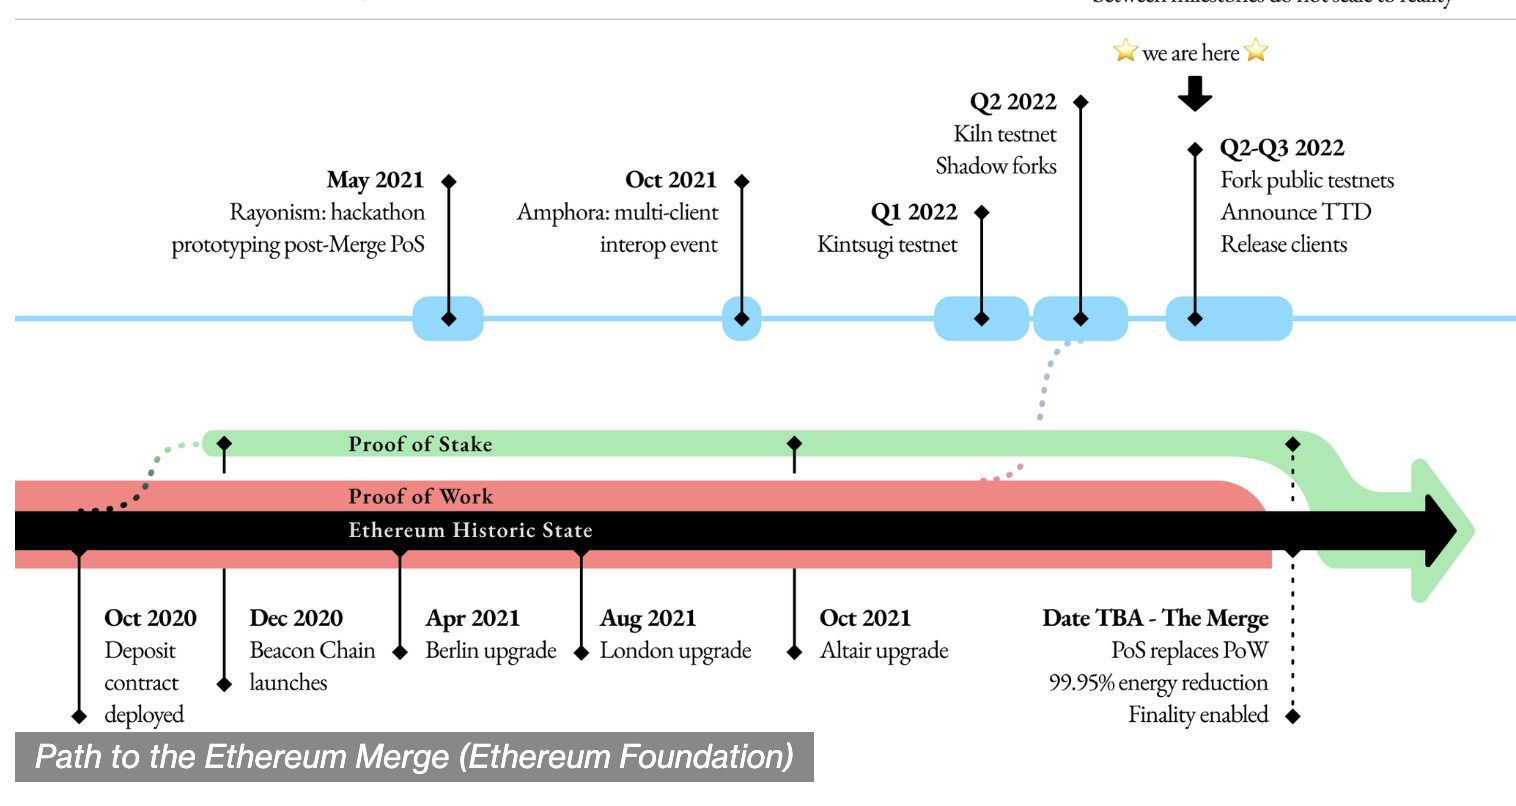

Secondly, the block time for Ethereum is also changed. The block processing time has decreased from 13 seconds to 12 seconds [(SARKAR 2022)](https://cointelegraph.com/news/ethereum-merge-spikes-block-creation-with-a-faster-average-block-time).
Thirdly, the consumption of energy also changed. Because of the change of consensus mechanism, the consumption of energy due to the computer power is greatly deduced [(“The Merge Brings down Ethereum’s Network Power Consumption by over 99.9%” n.d.)](https://cointelegraph.com/news/the-merge-brings-down-ethereum-s-network-power-consumption-by-over-99-9).
This is shown in the graph below. From this graph, we could see that before the Merge upgrade,  the energy consumption of Ethereum ranged about 46.31 terawatt hour (TWh) per year to 93.98 TWh per year. After merge, the network’s carbon footprint currently stands at 0.1 million tonnes of CO2 (MtCO2) per year [(“The Merge Brings down Ethereum’s Network Power Consumption by over 99.9%” n.d.)](https://cointelegraph.com/news/the-merge-brings-down-ethereum-s-network-power-consumption-by-over-99-9).


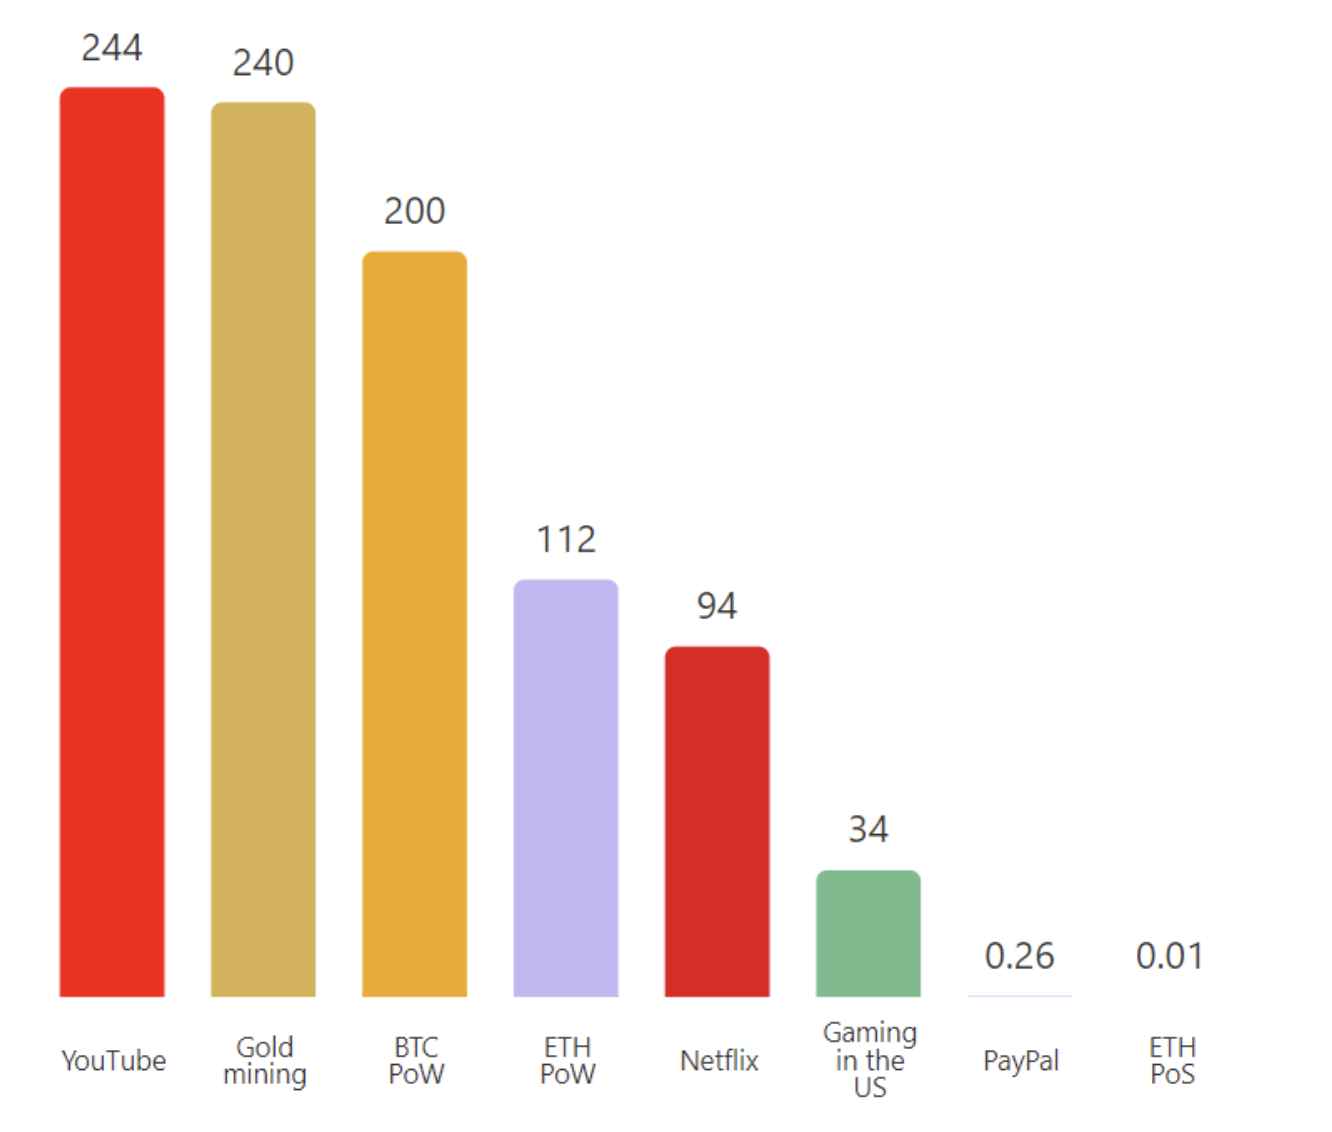

# Part I: Install Required Dependancies 

In [31]:
# install ethereum-etl and pandas

!python -m pip install ethereum-etl pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Part II: Mount Google Drive for Result Exports

In [2]:
# mount google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# print the current directory
!pwd

/content


In [4]:
#@title path
#create a project folder and identify the path
path = "/content/drive/MyDrive/EthereumETL" #@param {type:"string"}


In [5]:
#go to your project folder 
%cd /content/drive/MyDrive/EthereumETL

/content/drive/MyDrive/EthereumETL


In [6]:
# print the current directory again to make sure that you are in the project folder
!pwd

/content/drive/MyDrive/EthereumETL


# Part III: Query Data and Export CSV

## 0.Register Accounts on Remote Nodes Service and Get the URLs of the Nodes

### Remote node option 1: Infura

!!! Important Notes: Please replace https://mainnet.infura.io/v3/API_KEY with your own endpoints for all the codes below

In [7]:
#@title Import using the Infura node
infura_end_points_URL = "https://mainnet.infura.io/v3/API_KEY" #@param {type:"string"}


In [8]:
#@title Remote node option 2: Alchemy
alchemy_end_points_URL = "https://eth-mainnet.g.alchemy.com/v2/API_KEY" #@param {type:"string"}


In [9]:
#@title Remote node option 3: Quick nodes
quick_nodes_end_points_URL = "https://tiniest-young-meme.discover.quiknode.pro/API_KEY" #@param {type:"string"}




Data Range: We are going to query the block and transaction data for the ethereum blockchain before and after the merge (block number: 15537393 on September 15)

Reference; 
https://www.investopedia.com/ethereum-completes-the-merge-6666337



In [10]:
#@title the merge
merge = 15537393 #@param {type:"number"}

In [11]:
#@title data radius
radius = 5 #@param {type:"number"}


In [12]:
### find the start and the end
start = merge-radius
end = merge+radius
print(start, end)

15537388 15537398


## 1. Query Block Data

1.1 Infura

In [13]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_infura.csv --provider-uri https://mainnet.infura.io/v3/07a7bb3708454f40a7778a86b60c5e19

2022-11-20 08:46:15,337 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:16,544 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:16,544 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:01.206689.
2022-11-20 08:46:16,546 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-20 08:46:16,546 - CompositeItemExporter [INFO] - transaction items exported: 0


In [14]:
# import libraries to print data frame
import pandas as pd

In [15]:
# set to print the maximum numbers of rows
pd.set_option('display.max_rows', None)

In [16]:
df_blocks = pd.read_csv('./blocks_infura.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

1.2 Alchemy

In [17]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_alchemy.csv --provider-uri https://eth-mainnet.g.alchemy.com/v2/QLJSq4TtTByGwnyP7QphCnM3IcYRsQwy

2022-11-20 08:46:18,599 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:19,205 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:19,205 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:00.605965.
2022-11-20 08:46:19,207 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-20 08:46:19,207 - CompositeItemExporter [INFO] - transaction items exported: 0


In [18]:
df_blocks = pd.read_csv('./blocks_alchemy.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

1.3 Quick Nodes

In [19]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --blocks-output blocks_quicknodes.csv --provider-uri https://tiniest-young-meme.discover.quiknode.pro/a3c4715ec4dcb02ab817d1c69cbe73d85ad3adea/

2022-11-20 08:46:21,554 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:22,582 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:22,582 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:01.028638.
2022-11-20 08:46:22,584 - CompositeItemExporter [INFO] - block items exported: 11
2022-11-20 08:46:22,584 - CompositeItemExporter [INFO] - transaction items exported: 0


In [20]:
df_blocks = pd.read_csv('./blocks_quicknodes.csv')
display(df_blocks.head(10))

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
0,15537388,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0x5a2504b5e378f28d8f1fc52bac609eca4f3d79f444c5...,0x9206e9a5cae2058c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x502e0487a11080051205989994081820ca2800204251...,0xfb0a569d9a40d1c3ade913ca4eeac661550a6161fd4e...,0x98efdb8d69e7596b660ba0fea82d36f28864e0f95478...,0xaeba43330764722ccfa8b0c76f2c76fb54023a3804ac...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11031474385146923,58749948497083790670458,19789,0x6575726f70652d77657374332d38,30000000,15109407,1663224133,114,37190466833
1,15537389,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,0xebba2908368ba3fb,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x5620abc2a149744b80aa62dda3b974586111019d6104...,0x094b940cd0e1f500e15294d602ce5afcb178d08bbf10...,0xbf7fcb19e96cb3f211717553f58327f8e168403749e6...,0x3b7c1fba752ca54fba30f885ee25db1ecbafdc82956a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11032024140960811,58749959529107931631269,36493,0x617369612d65617374322d3131,30029295,26226335,1663224142,175,37224374311
2,15537390,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xc81d887fda0e021a4c54e68f9b6a78d3b70deb18b8af...,0x1f07464e8175235f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x10004008011000010810002c00c00040104204008440...,0xe16b12997e99393fab92f787e8fceb9880f226e62ed4...,0xde56e0e536fab72545f5c2e54be0fcbdf644cd551eee...,0x9befb155572b619e15a0af9f0cc56148903d4ef28534...,0x829bd824b016326a401d083b33d092293333a830,11037960627312277,58749970567068558943546,7807,0xe4b883e5bda9e7a59ee4bb99e9b1bc472121,30000000,6893891,1663224150,46,40698882159
3,15537391,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0xd5b9efdd3659f5b635e0505d787d6b6cc3af4c660def...,0xac2c3800025a764f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x53a240c0610070015299420086041090205a11062100...,0xd976f002afbac9fdf1b028336719b602b9f4660ca103...,0xb8d426f8c8b6ae1c34f6bebf904971be1611c29e8889...,0x6b4d994610806d8a5ed107996abc477688d4d0748763...,0x829bd824b016326a401d083b33d092293333a830,11043900012338719,58749981610968571282265,47274,0xe4b883e5bda9e7a59ee4bb99e9b1bc4b2e22,30000000,16969164,1663224155,105,37949635702
4,15537392,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x2f1dc309c7cc0a5a2e3b3dd9315fea0ffbc53c56f923...,0x232b0043952c93d9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x82864b3a65d1ac1917c426d48915dca0fc966fbf3f30...,0xfee48a40a2765ab31fcd06ab6956341d13dc2c4b9762...,0x13c10513b52358022f800e2f9f1c50328798427b1b4a...,0xea674fdde714fd979de3edf0f56aa9716b898ec8,11049842297455506,58749992660810868737771,16568,0x617369612d65617374322d31763932,30000000,29990952,1663224156,61,38572377838
5,15537393,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x2b3ea3cd4befcab070812443affb08bf17a91ce382c7...,0x62a3ee77461d4fc9,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x00000400000000000000000000000000000000000000...,0xdd5eec02b019ff76e359b09bfa19395a2a0e97bc01e7...,0x4919dafa6ac8becfbbd0c2808f6c9511a057c21e4283...,0xbaa842cfd552321a9c2450576126311e071680a12580...,0x829bd824b016326a401d083b33d092293333a830,11055787484078698,58750003716598352816469,1636,0xe4b883e5bda9e7a59ee4bb99e9b1bc460021,30000000,29991429,1663224162,1,43391016710
6,15537394,0x56a9bb0302da44b8c0b3df540781424684c3af04d0b7...,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,0x0000000000000000,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xffffffffffffffffffffffffffffffffffffffffffff...,0x1ea1746468686159ce730c1cc49a886721244e5d1fa9...,0x40c07091e16263270f3579385090fea02dd5f061ba67...,0x928073fb98ce316265ea35d95ab7e2e1206cecd85242...,0xeee27662c2b8eba3cd936a23f039f3189633e4c8,0,58750003716598352816469,18559,0x,30000000,29983006,1663224179,80,

Quiry result from three nodes are exactly the same.

## 2. Query Transaction Data

In [21]:
!ethereumetl export_blocks_and_transactions --start-block 15537388 --end-block 15537398 --transactions-output transactions.csv --provider-uri https://mainnet.infura.io/v3/07a7bb3708454f40a7778a86b60c5e19

2022-11-20 08:46:25,285 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:28,517 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:28,517 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:03.231576.
2022-11-20 08:46:28,517 - CompositeItemExporter [INFO] - block items exported: 0
2022-11-20 08:46:28,519 - CompositeItemExporter [INFO] - transaction items exported: 1140


In [22]:
df_transactions = pd.read_csv('./transactions.csv')
display(df_transactions.head())

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,0x1ccbdb9913d35d7f870ba1822159ae4ca1f660faa208...,0,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,0,0xb6d44ba99e6e31ca00a888a5232ff332b0d607a3,0xb6d44ba99e6e31ca00a888a5232ff332b0d607a3,0,180000,131914672959,0x,1663224133,1.319147e+11,1.120000e+11,2
1,0x414e84145408904ac945a108ab946edcec19185a2c94...,113,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,1,0x87033ad96757ecd730aa1652b1a7dabcc5ffb182,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,150000000000000000,253035,67190466833,0x5ae401dc000000000000000000000000000000000000...,1663224133,1.201975e+11,3.000000e+10,2
2,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,1280,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,2,0x4ffb72b66eba24521736924f87dfe10677d82286,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0,180000,67190466833,0x1249c58b,1663224133,3.000000e+11,3.000000e+10,2
3,0xe72ef9baee086d62ded0f80e124d01c7f703f9a46d65...,13,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,3,0xb73f92d089fceb224cfe24a916bdd3b9bd0f6666,0xc4ee0aa2d993ca7c9263ecfa26c6f7e13009d2b6,0,56694,51128340341,0x095ea7b30000000000000000000000006fbf1b6a6813...,1663224133,NaN,NaN,0
4,0xd82e5c7f0392e94c5228f4e0bdb827212a9e84463849...,9108,0x34f2900754317c14b2479f9a0342b0f4e16bd4681a5f...,15537388,4,0x7dacfce9eacdca48cad5ba0b61560586c375890b,0xe2b8eb988735f7709d08b7d07b41460073904830,0,291019,50901357660,0x00000000000000000000000000000000000000000000...,1663224133,5.090136e+10,1.444116e+10,2


## 3. Query Token Data

### 3.1 Query All Token Transfers

In [23]:
!ethereumetl export_token_transfers --start-block 15537388 --end-block 15537398 --provider-uri https://eth-mainnet.g.alchemy.com/v2/QLJSq4TtTByGwnyP7QphCnM3IcYRsQwy    --output token_transfers.csv

2022-11-20 08:46:30,337 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:41,320 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:41,320 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:10.983146.
2022-11-20 08:46:41,322 - CompositeItemExporter [INFO] - token_transfer items exported: 30889


In [24]:
df_token_transfers = pd.read_csv('./token_transfers.csv')
display(df_token_transfers.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,150000000000000000,0x414e84145408904ac945a108ab946edcec19185a2c94...,1,15537388
1,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,2169959720320717682633283658,0x414e84145408904ac945a108ab946edcec19185a2c94...,2,15537388
2,0x397abdfb6ec12e6fa24d84cbabb1505157a5caac,0x8a84c20c27d8e55a4e54ce19db0b1be4a05c6720,0x87033ad96757ecd730aa1652b1a7dabcc5ffb182,52079033287697224383198807811,0x414e84145408904ac945a108ab946edcec19185a2c94...,3,15537388
3,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x4ffb72b66eba24521736924f87dfe10677d82286,6172,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,6,15537388
4,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x5720eb958685deeeb5aa0b34f677861ce3a8c7f5,0xe2b8eb988735f7709d08b7d07b41460073904830,23145141942,0xd82e5c7f0392e94c5228f4e0bdb827212a9e84463849...,8,15537388


In [25]:
df = df_token_transfers[df_token_transfers.token_address=="0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a"]
df.head()

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
3,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x4ffb72b66eba24521736924f87dfe10677d82286,6172,0xc3decb6a4a09de496947b85da6f0195ce8ee3afceb9e...,6,15537388
11,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0xe8fcd7bdb10280786a5b81ffde44924b12d1f038,6173,0x4ef5e95799dbe1eff4bc909dd14bcdf98627090c1a4f...,21,15537388
12,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x8b90d68eedad4be67e1087528d5ec9003009d667,6174,0x945850db8500d073f4496541340d9b5b27c71a46d96a...,22,15537388
13,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0xf93040508f5748fd1d5d5ada09c079cc160d168c,6175,0x77ec0b8fe7104ec7cb38d592d90a3c733b0a50d894b4...,23,15537388
14,0x7bc25283a29a3888cab4555ea86ff1a8c18cc90a,0x0000000000000000000000000000000000000000,0x2d0623a594f25070b69f01371aff2347bfaee56d,6176,0x7489f295214cb79a27fbe4ba6e3a29632a4d6e07f9a2...,24,15537388


### 3.1 Query a specific token transfers

*references*:

* Commond Documentations: https://ethereum-etl.readthedocs.io/en/latest/commands/
* Token Address: https://github.com/blockchain-etl/ethereum-etl-airflow/blob/master/dags/resources/stages/seed/data/token_amendments.csv
* More detailed: https://github.com/blockchain-etl/ethereum-etl-airflow
* Proof-of-Reserve: https://blog.chain.link/stablecoins-and-proof-of-reserve/





In [26]:
#@title Token Name
Token_Name = "Uniswap" #@param {type:"string"}



In [27]:
#@title Token Symbol
Token_Symbol = "UNI" #@param {type:"string"}


In [28]:
#@title Token Address
token_address = "0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984" #@param {type:"string"}


In [29]:
!ethereumetl export_token_transfers --start-block 15537388 --end-block 15537398 --provider-uri https://mainnet.infura.io/v3/07a7bb3708454f40a7778a86b60c5e19  --output token_transfers_UNI.csv --tokens 0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984

2022-11-20 08:46:43,093 - ProgressLogger [INFO] - Started work. Items to process: 11.
2022-11-20 08:46:44,261 - ProgressLogger [INFO] - 11 items processed. Progress is 100%.
2022-11-20 08:46:44,262 - ProgressLogger [INFO] - Finished work. Total items processed: 11. Took 0:00:01.168504.
2022-11-20 08:46:44,263 - CompositeItemExporter [INFO] - token_transfer items exported: 3


In [30]:
df_token_transfers_UNI = pd.read_csv('./token_transfers_UNI.csv')
display(df_token_transfers_UNI.head())

,token_address,from_address,to_address,value,transaction_hash,log_index,block_number
0,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,0xdafd66636e2561b0284edde37e42d192f2844d40,0x74de5d4fcbf63e00296fd95d33236b9794016631,5974796181176103987,0x7eed50059bb7f850de7221bd9959522461edef5cd702...,60,15537388
1,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x2acf35c9a3f4c5c3f4c78ef5fb64c3ee82f07c45,52279466585290908,0x7eed50059bb7f850de7221bd9959522461edef5cd702...,63,15537388
2,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,0x74de5d4fcbf63e00296fd95d33236b9794016631,0x8e2efa9ed16f07d9b153d295d35025fd677bae99,5922516714590813079,0x7eed50059bb7f850de7221bd9959522461edef5cd702...,64,15537388
